<a href="https://colab.research.google.com/github/yashvantraodipti/Assignment13/blob/main/Assignment13__Classification_using_KNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#loading dataset
glass=pd.read_csv('/content/glass.csv')

In [3]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
#to split train and test data
from sklearn.model_selection import train_test_split
train,test=train_test_split(glass,test_size=0.3,random_state=0)

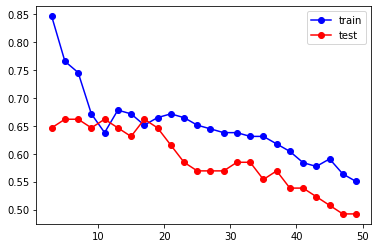

In [5]:
#KNN
from sklearn.neighbors import KNeighborsClassifier as KNC
#to find best k value
acc=[]
for i in range(3,50,2):
    neigh=KNC(n_neighbors=i)
    neigh.fit(train.iloc[:,0:9],train.iloc[:,9])
    train_acc=np.mean(neigh.predict(train.iloc[:,0:9])==train.iloc[:,9])
    test_acc=np.mean(neigh.predict(test.iloc[:,0:9])==test.iloc[:,9])
    acc.append([train_acc,test_acc])
    
plt.plot(np.arange(3,50,2),[i[0] for i in acc],'bo-')
plt.plot(np.arange(3,50,2),[i[1] for i in acc],'ro-')
plt.legend(['train','test'])

In [6]:
#from plots at k=5 we get best model
#model building at k=5 
neigh=KNC(n_neighbors=5)
neigh.fit(train.iloc[:,0:9],train.iloc[:,9])
pred_train=neigh.predict(train.iloc[:,0:9])
train_acc=np.mean(pred_train==train.iloc[:,9])
train_acc#0.76
pred_test=neigh.predict(test.iloc[:,0:9])
test_acc=np.mean(pred_test==test.iloc[:,9])
test_acc#0.661

0.6615384615384615